# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [2]:
import pandas as pd 

experiments = pd.read_csv("results/experiments.csv", delimiter=";")
events = pd.read_csv("results/events.csv", delimiter=";")
fitness_values = pd.read_csv("results/fitness_values.csv", delimiter=";")

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_37454/675973436.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Remove potential trailing white spaces from column names
experiments.columns = experiments.columns.str.strip()
events.columns = events.columns.str.strip()
fitness_values.columns = fitness_values.columns.str.strip()

In [4]:
from datetime import datetime

experiments["created_at"] = experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
events["created_at"] = events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
fitness_values["created_at"] = fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [5]:
experiments = experiments.sort_values(by=["created_at"], ascending=True)
events = events.sort_values(by=["created_at"], ascending=True)
fitness_values = fitness_values.sort_values(by=["created_at"], ascending=True)

## Visualize Fitness Value Changes By Experiment

In [6]:
experiments

,experiment_id,description,ga_params,gate_set,fitness,fitness_params,optimizer,optimizer_params,created_at,last_commit_id
0,grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f...,Experiment run without any treatments,"GAParams(population_size=1000, generations=100...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-04 14:22:26.603405,8990c9f37155b5689eaad409ca26e09c490563bd
1,grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a73...,Base line fitness function with abstraction l...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-07 13:33:40.841359,88b6ac7d2613aaf1d18d8fb15419acb6668d0905


Experiment Id: grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f8d669
	Description: Experiment run without any treatments
	2024-04-04 14:24:30.161253 - 2024-04-06 16:17:42.894421


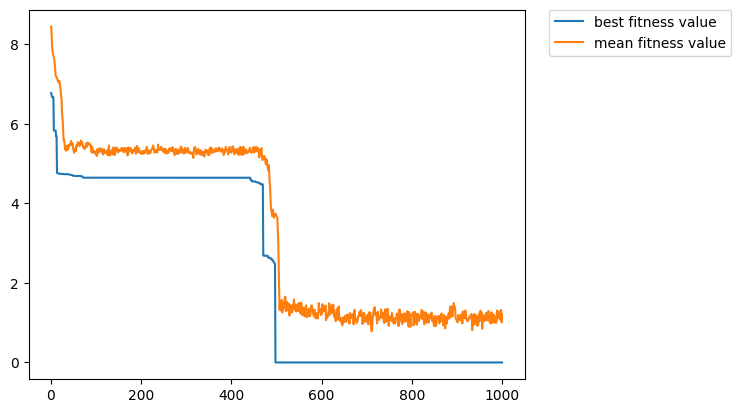

Experiment Id: grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a734f852
	Description: Base line fitness function with abstraction learning enabled.
	2024-04-07 13:35:55.946408 - 2024-04-10 08:34:32.583305


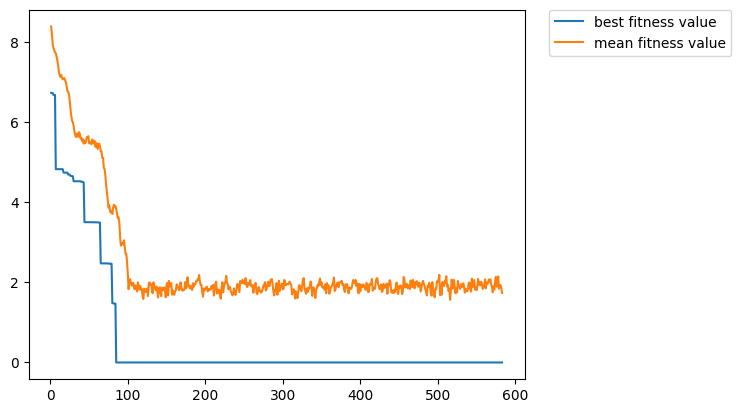

In [15]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\tDescription: {description}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")
    
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

Development of best fitness values:


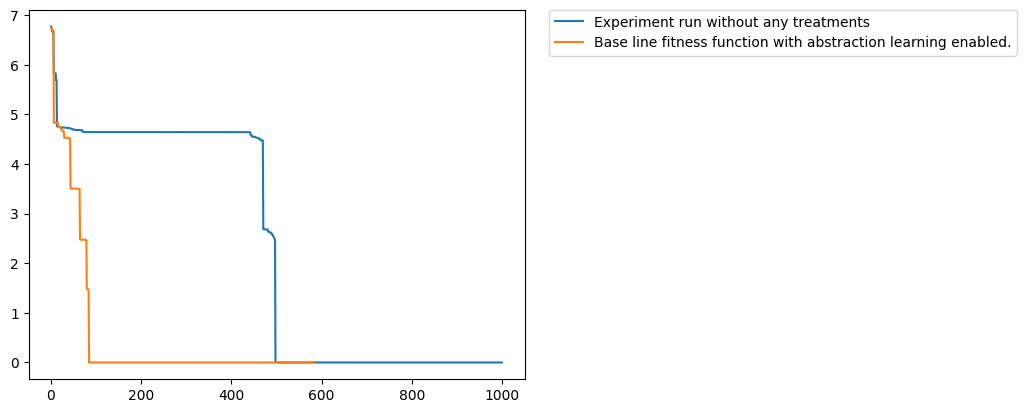

In [16]:
experiment_ids = experiments["experiment_id"].unique()
descriptions = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    descriptions.append(description)
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
    
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])

print("Development of best fitness values:")
plt.legend(descriptions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Development of mean fitness values:


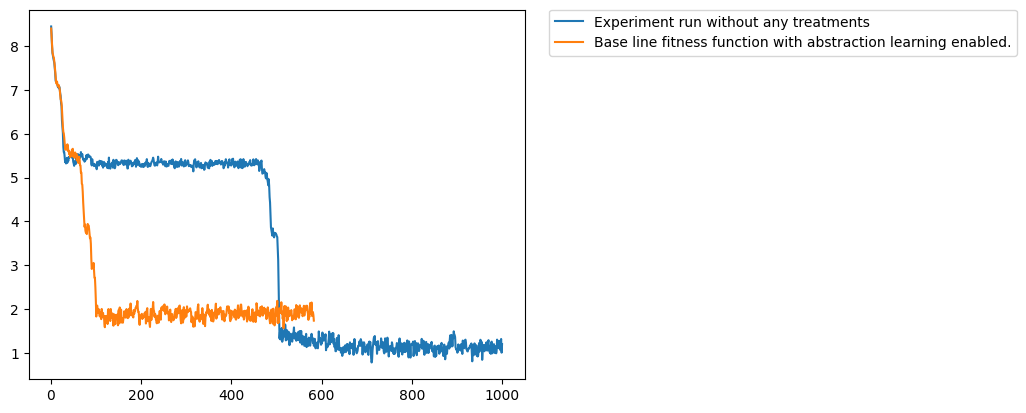

In [17]:
experiment_ids = experiments["experiment_id"].unique()
descriptions = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    description = experiments.loc[experiments["experiment_id"] == experiment_id]["description"].tolist()[0].strip()
    descriptions.append(description)
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])

print("Development of mean fitness values:")
plt.legend(descriptions, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Print the best gate sequence of each experiment

In [34]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tDescription: {experiment['description']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f8d669
	Description:  Experiment run without any treatments
	Best fitness value: 0.00017
	Best chromosome:  [id(target=1), id(target=1), id(target=1), id(target=0), id(target=2), id(target=1), id(target=0), rx(theta=1.5007794795390148,target=2), crx(theta=-2.2631071926725865,control=2,target=0), id(target=0), x(target=0), id(target=2), id(target=0), id(target=2), id(target=2), id(target=2), h(target=1), id(target=1), swap(target1=0,target2=1), id(target=1), id(target=0), oracle(target1=1,target2=2,target3=0), ry(theta=-2.1560950555086276,target=1), cry(theta=3.141592653589793,control=2,target=0), oracle(target1=2,target2=1,target3=0), h_layer(), swap(target1=1,target2=0), ccx(control1=0,control2=1,target=2), id(target=2), y_layer()]

Experiment Id: grover_3qubits_8ea564a1-9540-4f2a-91c6-5b75a734f852
	Description:  Base line fitness function with abstraction learning enabled.
	Best fitness value: 0.00032
	Best chromosome:  [id